In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

from ISLP.transforms import (BSpline,
                             NaturalSpline)
from ISLP.models import bs, ns
from ISLP.pygam import (approx_lam,
                        degrees_of_freedom,
                        plot as plot_gam,
                        anova as anova_gam)


## Question 7
In Section 8.3.3, we applied random forests to the Boston data using
max_features = 6 and using n_estimators = 100 and n_estimators =
500. Create a plot displaying the test error resulting from random
forests on this data set for a more comprehensive range of values
for max_features and n_estimators. You can model your plot after
Figure 8.10. Describe the results obtained.

In [2]:
import random
import pandas as pd
import plotly.express as px

from ISLP import load_data
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, PredefinedSplit

random.seed(0)
data = load_data('Boston')

X = data.drop("medv", axis=1)
y = data["medv"]

forest = RandomForestRegressor(n_estimators=100, random_state=0)

test_size = 0.2
test_fold = [-1] * int((1 - test_size) * len(X)) + [0] * int(test_size * len(X))
random.shuffle(test_fold)
ps = PredefinedSplit(test_fold=test_fold)

max_features = list(range(1, X.shape[1] + 1))
n_estimators = list(range(10)) + list(range(10, 101, 10))
param_grid = {'n_estimators': n_estimators, 'max_features': max_features}

grid_search = GridSearchCV(forest, param_grid, cv=ps, n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(X, y)

results = pd.DataFrame(grid_search.cv_results_)


Fitting 1 folds for each of 240 candidates, totalling 240 fits


/home/albert/miniforge3/envs/islp/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/home/albert/miniforge3/envs/islp/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/albert/miniforge3/envs/islp/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/albert/miniforge3/envs/islp/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    va

In [3]:
results["mean_test_error"] = 1 - results["mean_test_score"]
fig = px.line(
    results,
    x='param_n_estimators',y="mean_test_error", color='param_max_features')
fig.show()

In [4]:
results.sort_values("mean_test_error").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score,mean_test_error
144,0.008946,0.0,0.001537,0.0,8,4,"{'max_features': 8, 'n_estimators': 4}",0.919787,0.919787,0.0,1,0.961435,0.961435,0.0,0.080213
218,0.188686,0.0,0.003822,0.0,11,90,"{'max_features': 11, 'n_estimators': 90}",0.915960,0.915960,0.0,2,0.979184,0.979184,0.0,0.084040
219,0.212045,0.0,0.005373,0.0,11,100,"{'max_features': 11, 'n_estimators': 100}",0.915818,0.915818,0.0,3,0.979215,0.979215,0.0,0.084182
239,0.194601,0.0,0.003636,0.0,12,100,"{'max_features': 12, 'n_estimators': 100}",0.914740,0.914740,0.0,4,0.979527,0.979527,0.0,0.085260
217,0.171164,0.0,0.004676,0.0,11,80,"{'max_features': 11, 'n_estimators': 80}",0.914579,0.914579,0.0,5,0.979062,0.979062,0.0,0.085421
238,0.164453,0.0,0.003667,0.0,12,90,"{'max_features': 12, 'n_estimators': 90}",0.913956,0.913956,0.0,6,0.979335,0.979335,0.0,0.086044
216,0.174882,0.0,0.005419,0.0,11,70,"{'max_features': 11, 'n_estimators': 70}",0.912350,0.912350,0.0,7,0.979038,0.979038,0.0,0.087650
237,0.170442,0.0,0.003205,0.0,12,80,"{'max_features': 12, 'n_estimators': 80}",0.912103,0.912103,0.0,8,0.978975,0.978975,0.0,0.087897
215,0.112297,0.0,0.002697,0.0,11,60,"{'max_features': 11, 'n_estimators': 60}",0.910752,0.910752,0.0,9,0.978688,0.978688,0.0,0.089248
236,0.129550,0.0,0.003008,0.0,12,70,"{'max_features': 12, 'n_estimators': 70}",0.910155,0.910155,0.0,10,0.978586,0.978586,0.0,0.089845


## Question 8
In the lab, a classification tree was applied to the Carseats data set af-
ter converting Sales into a qualitative response variable. Now we will
seek to predict Sales using regression trees and related approaches,
treating the response as a quantitative variable.

Train MSE: 3.89
Test MSE: 4.01


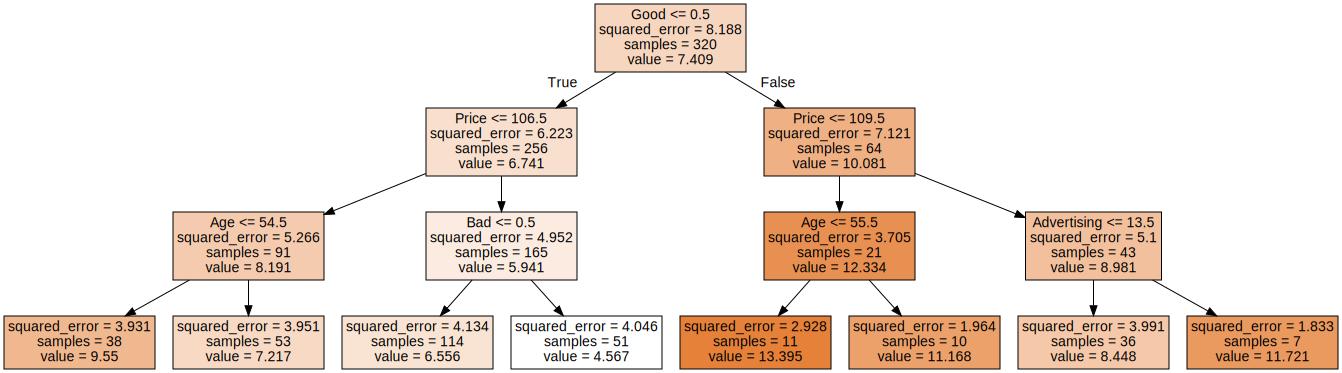

In [5]:
import graphviz

from IPython.display import display
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split

carseats = load_data('Carseats')

scaler = StandardScaler()

X = carseats.drop("Sales", axis=1)
X["Urban"] = X["Urban"].map({"No": 0, "Yes": 1})
X["US"] = X["US"].map({"No": 0, "Yes": 1})
X["ShelveLoc"] = X["ShelveLoc"].map({"Bad": 0, "Medium": 1, "Good": 2})
X["Bad"] = X["ShelveLoc"] == 0
X["Medium"] = X["ShelveLoc"] == 1
X["Good"] = X["ShelveLoc"] == 2
X = X.drop("ShelveLoc", axis=1)

y = carseats["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tree = DecisionTreeRegressor(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)
print(f"Train MSE: {train_loss:.2f}")
print(f"Test MSE: {test_loss:.2f}")


display(graphviz.Source(export_graphviz(tree, out_file=None, feature_names=X.columns, filled=True)))

In [6]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 11)}
grid_search = GridSearchCV(tree, param_grid, cv=5, n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
results["mean_test_error"] = 1 - results["mean_test_score"]

results.sort_values(by="mean_test_error").head(10)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/albert/miniforge3/envs/islp/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,mean_test_error
6,0.002701,0.000388,0.001398,0.000188,7,{'max_depth': 7},0.366617,0.492523,0.183373,0.491373,...,0.122167,1,0.933286,0.942661,0.931358,0.914764,0.917451,0.927904,0.010398,0.593328
5,0.002970,0.000256,0.001247,0.000169,6,{'max_depth': 6},0.395366,0.476829,0.254010,0.406124,...,0.077268,2,0.867507,0.872997,0.875627,0.861919,0.862578,0.868126,0.005471,0.603276
2,0.002845,0.000158,0.001461,0.000170,3,{'max_depth': 3},0.343435,0.528483,0.299872,0.375075,...,0.077630,3,0.529251,0.509871,0.551593,0.544475,0.542201,0.535478,0.014699,0.618201
9,0.002843,0.000339,0.001238,0.000209,10,{'max_depth': 10},0.321334,0.436443,0.251714,0.477799,...,0.081394,4,0.991585,0.999411,0.994700,0.985515,0.991436,0.992530,0.004547,0.622083
8,0.002719,0.000470,0.001275,0.000231,9,{'max_depth': 9},0.276456,0.409466,0.261134,0.483348,...,0.083300,5,0.985297,0.994828,0.986825,0.972140,0.979798,0.983778,0.007550,0.638516
7,0.002933,0.000407,0.001257,0.000201,8,{'max_depth': 8},0.257366,0.519892,0.108286,0.469557,...,0.154264,6,0.972164,0.976657,0.966111,0.953669,0.956085,0.964937,0.008903,0.639629
3,0.002781,0.000279,0.001606,0.000197,4,{'max_depth': 4},0.356553,0.499030,0.250353,0.284124,...,0.088159,7,0.667937,0.644564,0.674088,0.685907,0.660667,0.666633,0.013794,0.641616
4,0.002853,0.000318,0.001401,0.000208,5,{'max_depth': 5},0.242284,0.537440,0.144471,0.343195,...,0.143279,8,0.784367,0.788642,0.787957,0.784613,0.779085,0.784933,0.003392,0.653139
1,0.002581,0.000254,0.001269,0.000096,2,{'max_depth': 2},0.254099,0.437801,0.182855,0.295155,...,0.092970,9,0.382939,0.378912,0.412293,0.422261,0.389141,0.397109,0.017080,0.686785
0,0.002326,0.000271,0.001446,0.000103,1,{'max_depth': 1},0.247539,0.257156,0.003412,0.181270,...,0.098582,10,0.206742,0.205820,0.250029,0.226459,0.203809,0.218572,0.017733,0.808779


In [8]:
import plotly.express as px

fig = px.line(results, x='param_max_depth', y='mean_test_error', title='Decision Tree Regressor')
fig.add_vline(x=results["param_max_depth"][results["mean_test_error"].idxmin()], line_dash="dash", line_color="red")
fig.show()

In [9]:
results.sort_values("mean_test_error").head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,mean_test_error
6,0.002701,0.000388,0.001398,0.000188,7,{'max_depth': 7},0.366617,0.492523,0.183373,0.491373,...,0.122167,1,0.933286,0.942661,0.931358,0.914764,0.917451,0.927904,0.010398,0.593328


In [10]:
optimal_tree = DecisionTreeRegressor(max_depth=7, random_state=0)
optimal_tree.fit(X_train, y_train)

path = optimal_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig = px.line(
    x=ccp_alphas,
    y=impurities,
    markers=True,
    title="Total Impurity vs Effective Alpha",
    labels={"x": "Effective Alpha", "y": "Total Impurity"},
)
fig.show()

In [11]:
tree.feature_importances_

array([0.        , 0.        , 0.04565407, 0.        , 0.33118595,
       0.10645524, 0.        , 0.        , 0.        , 0.10136779,
       0.        , 0.41533696])

In [12]:
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=0)
    tree.fit(X_train, y_train)
    trees.append(tree)

    print(f"Alpha: {ccp_alpha:.2f}, Number of Nodes: {tree.tree_.node_count}")


Alpha: 0.00, Number of Nodes: 635
Alpha: 0.00, Number of Nodes: 591
Alpha: 0.00, Number of Nodes: 555
Alpha: 0.00, Number of Nodes: 549
Alpha: 0.00, Number of Nodes: 543
Alpha: 0.00, Number of Nodes: 499
Alpha: 0.00, Number of Nodes: 489
Alpha: 0.00, Number of Nodes: 485
Alpha: 0.00, Number of Nodes: 459
Alpha: 0.00, Number of Nodes: 427
Alpha: 0.00, Number of Nodes: 405
Alpha: 0.00, Number of Nodes: 403
Alpha: 0.00, Number of Nodes: 367
Alpha: 0.00, Number of Nodes: 349
Alpha: 0.00, Number of Nodes: 343
Alpha: 0.00, Number of Nodes: 327
Alpha: 0.00, Number of Nodes: 297
Alpha: 0.00, Number of Nodes: 283
Alpha: 0.00, Number of Nodes: 277
Alpha: 0.00, Number of Nodes: 273
Alpha: 0.00, Number of Nodes: 263
Alpha: 0.00, Number of Nodes: 241
Alpha: 0.00, Number of Nodes: 237
Alpha: 0.00, Number of Nodes: 233
Alpha: 0.00, Number of Nodes: 223
Alpha: 0.01, Number of Nodes: 209
Alpha: 0.01, Number of Nodes: 205
Alpha: 0.01, Number of Nodes: 195
Alpha: 0.01, Number of Nodes: 189
Alpha: 0.01, N

In [13]:
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]


prune_df = pd.DataFrame(
    {"Alpha": ccp_alphas, "Train Score": train_scores, "Test Score": test_scores}
)
fig = px.line(
    prune_df,
    x="Alpha",
    y=["Train Score", "Test Score"],
    title="Accuracy vs Alpha",
    markers=True,
    labels={"value": "Accuracy"},
)
fig.update_layout({"legend_title": "Dataset"})
fig.show()

In [14]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor(estimator=optimal_tree, n_estimators=100, random_state=0)
bagging.fit(X_train, y_train)

train_mse  = mean_squared_error(y_train, bagging.predict(X_train))
test_mse = mean_squared_error(y_test, bagging.predict(X_test))
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")


feature_importances = pd.DataFrame([
    tree.feature_importances_ for tree in bagging.estimators_
], columns=X.columns)


Train MSE: 0.64
Test MSE: 2.24


In [15]:
feature_importances.describe().T

,count,mean,std,min,25%,50%,75%,max
CompPrice,100.0,0.102913,0.033444,0.037752,0.077041,0.100603,0.123505,0.211098
Income,100.0,0.047658,0.026288,0.011968,0.028990,0.043677,0.060282,0.170462
Advertising,100.0,0.062628,0.033239,0.002666,0.037250,0.059231,0.085990,0.155058
Population,100.0,0.031243,0.020882,0.002570,0.017321,0.025365,0.042077,0.100471
Price,100.0,0.296271,0.040432,0.207598,0.268249,0.295819,0.323162,0.423496
Age,100.0,0.115941,0.039930,0.018956,0.090988,0.114236,0.144524,0.217179
Education,100.0,0.026510,0.016804,0.000944,0.012537,0.022986,0.037816,0.068340
Urban,100.0,0.003006,0.004306,0.000000,0.000154,0.001526,0.003994,0.022261
US,100.0,0.006059,0.009978,0.000000,0.000146,0.001607,0.009443,0.069616
Bad,100.0,0.085466,0.095685,0.000000,0.003337,0.035092,0.187770,0.289122


In [16]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=0, max_features="sqrt")
forest.fit(X_train, y_train)

forest_feature_importances = pd.DataFrame([
    tree.feature_importances_ for tree in forest.estimators_
], columns=X.columns)

forest_feature_importances.describe().T

,count,mean,std,min,25%,50%,75%,max
CompPrice,100.0,0.091214,0.028481,0.030002,0.070892,0.091290,0.113589,0.163825
Income,100.0,0.082516,0.032970,0.024335,0.058903,0.075616,0.101106,0.175356
Advertising,100.0,0.073735,0.032404,0.014596,0.052122,0.072141,0.089994,0.169821
Population,100.0,0.070654,0.028313,0.007845,0.052658,0.065866,0.086623,0.145234
Price,100.0,0.228468,0.062332,0.069352,0.189953,0.228555,0.272286,0.364939
Age,100.0,0.117002,0.044931,0.044089,0.085149,0.111117,0.136900,0.251176
Education,100.0,0.048034,0.022447,0.010976,0.032604,0.040734,0.063086,0.117783
Urban,100.0,0.010167,0.006515,0.000043,0.004815,0.008761,0.014329,0.030855
US,100.0,0.017253,0.016206,0.000099,0.005642,0.012688,0.022633,0.080274
Bad,100.0,0.097354,0.070718,0.000000,0.040229,0.084827,0.156654,0.251253


In [17]:
def fit_forest_with_n_features(n_features):
    forest = RandomForestRegressor(n_estimators=100, random_state=0, max_features=n_features)
    forest.fit(X_train, y_train)

    train_score = forest.score(X_train, y_train)
    test_score = forest.score(X_test, y_test)
    return train_score, test_score


n_features = list(range(1, X.shape[1] + 1))
scores = [fit_forest_with_n_features(n) for n in n_features]
train_scores = [score[0] for score in scores]
test_scores = [score[1] for score in scores]


df = pd.DataFrame({"n_features": n_features, "train_score": train_scores, "test_score": test_scores})
fig = px.line(
    df,
    x="n_features",
    y=["train_score", "test_score"],
    title="Random Forest Train Score vs Number of Features",
    labels={"value": "Score", "x": "Max Features"},
    markers=True,
)
fig.add_vline(x=df["n_features"][df["test_score"].idxmax()], line_dash="dash", line_color="red")
fig.show()

In [18]:
import numpy as np
from ISLP.bart import BART


bart_model = BART(num_trees=100, burnin=5, ndraw=15, random_state=0)
bart_model.fit(X_train.astype(np.float32), y_train)

y_train_pred = bart_model.predict(X_train.astype(np.float32).to_numpy())
y_test_pred = bart_model.predict(X_test.astype(np.float32).to_numpy())

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)


print(f"Baseline Train MSE:", np.mean((y_train - np.mean(y_train)) ** 2))
print(f"Baseline Test MSE:", np.mean((y_test - np.mean(y_train)) ** 2))
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

var_inclusion = pd.Series(bart_model.variable_inclusion_.mean(0), index=X.columns)
var_inclusion.sort_values(ascending=False)

Baseline Train MSE: 8.187849
Baseline Test MSE: 7.065166
Train MSE: 0.98
Test MSE: 1.66


Price          19.933333
Good           15.000000
Advertising    14.466667
CompPrice      14.400000
Age            12.466667
Bad            12.466667
Population     12.133333
US             12.000000
Medium         11.800000
Education       9.666667
Income          9.066667
Urban           7.466667
dtype: float64

# Question 9

In [19]:
df = load_data("OJ")
for col in df.select_dtypes("object"):
    df[col] = df[col].astype("category").cat.codes

X = df.drop("Purchase", axis=1)

y = df["Purchase"].astype("category").cat.codes

num_samples = 1000

X_train = X.iloc[:num_samples]
y_train = y.iloc[:num_samples]
X_test = X.iloc[num_samples:]
y_test = y.iloc[num_samples:]

X_train.head()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [20]:
X.dtypes

WeekofPurchase      int64
StoreID             int64
PriceCH           float64
PriceMM           float64
DiscCH            float64
DiscMM            float64
SpecialCH           int64
SpecialMM           int64
LoyalCH           float64
SalePriceMM       float64
SalePriceCH       float64
PriceDiff         float64
Store7               int8
PctDiscMM         float64
PctDiscCH         float64
ListPriceDiff     float64
STORE               int64
dtype: object

In [21]:
from sklearn.tree import DecisionTreeClassifier
oj_tree = DecisionTreeClassifier(random_state=0, max_depth=3)
oj_tree.fit(X_train, y_train)

train_mse = mean_squared_error(y_train, oj_tree.predict(X_train))
test_mse = mean_squared_error(y_test, oj_tree.predict(X_test))

print(f"Baseline Train MSE:", np.mean((y_train - np.mean(y_train)) ** 2))
print(f"Baseline Test MSE:", np.mean((y_test - np.mean(y_train)) ** 2))
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Baseline Train MSE: 0.23939099999999996
Baseline Test MSE: 0.2164661428571429
Train MSE: 0.17
Test MSE: 0.24


In [22]:
df.dtypes

Purchase             int8
WeekofPurchase      int64
StoreID             int64
PriceCH           float64
PriceMM           float64
DiscCH            float64
DiscMM            float64
SpecialCH           int64
SpecialMM           int64
LoyalCH           float64
SalePriceMM       float64
SalePriceCH       float64
PriceDiff         float64
Store7               int8
PctDiscMM         float64
PctDiscCH         float64
ListPriceDiff     float64
STORE               int64
dtype: object

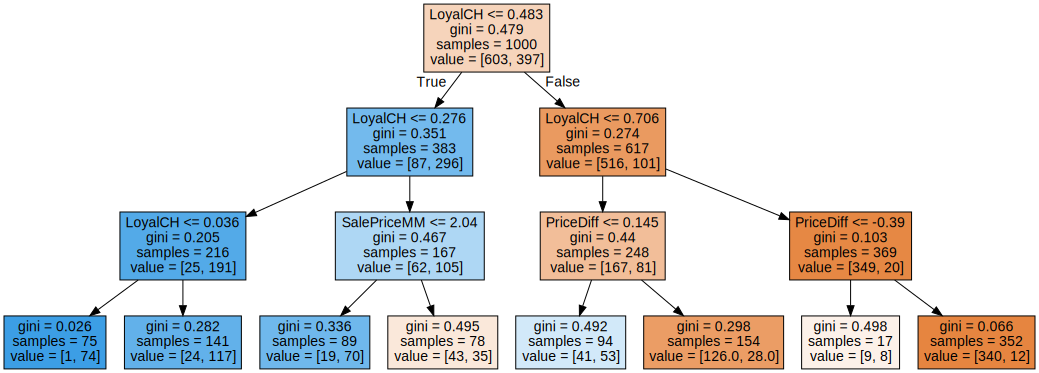

In [23]:
display(graphviz.Source(export_graphviz(oj_tree, out_file=None, feature_names=X.columns, filled=True)))

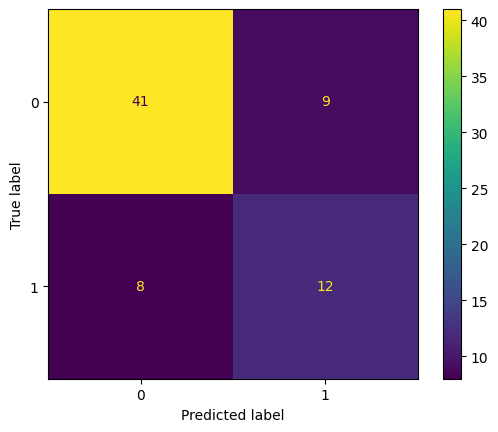

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = oj_tree.predict(X_test)
y_test_pred_labels = y_test_pred > 0.5

confuse = confusion_matrix(y_test, y_test_pred_labels, labels=[0, 1])
ConfusionMatrixDisplay.from_estimator(oj_tree, X_test, y_test)


In [25]:
test_error_rate = 1 - oj_tree.score(X_test, y_test)
test_error_rate

0.24285714285714288

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 11)}
grid_search = GridSearchCV(oj_tree, param_grid, cv=5, n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
results["mean_test_error"] = 1 - results["mean_test_score"]

best_params = grid_search.best_params_

results.sort_values("mean_test_error").head(1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,mean_test_error
2,0.002617,0.000297,0.001186,0.000149,3,{'max_depth': 3},0.805,0.87,0.765,0.845,...,0.038523,1,0.845,0.82375,0.84875,0.8325,0.8325,0.8365,0.009131,0.186


In [27]:
import plotly.express as px

fig = px.line(results, x='param_max_depth', y='mean_test_error', title='Decision Tree Classifier')
fig.show()


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

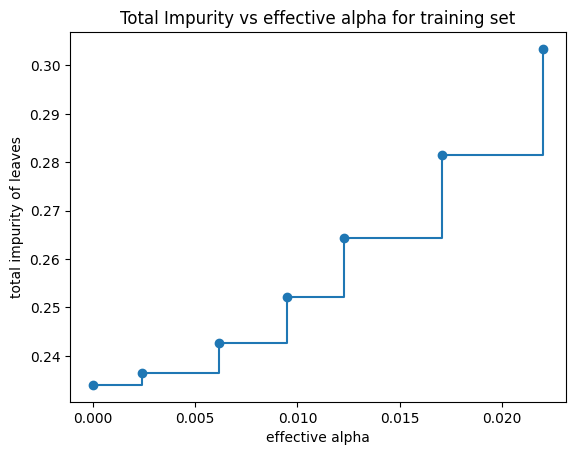

In [28]:
best_estimator = grid_search.best_estimator_
best_estimator.cost_complexity_pruning_path(X_train, y_train)

path = best_estimator.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [29]:
alphas = ccp_alphas[ccp_alphas > 0]
param_grid = {'ccp_alpha': alphas}

base_tree = DecisionTreeClassifier(max_depth=best_params['max_depth'], random_state=0)
grid_search = GridSearchCV(base_tree, param_grid, cv=5, n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
results["mean_test_error"] = 1 - results["mean_test_score"]
results.sort_values("mean_test_error").head(1)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,mean_test_error
0,0.002577,0.000518,0.001128,0.000212,0.00241,{'ccp_alpha': 0.0024098423955870793},0.805,0.87,0.765,0.845,...,0.038523,1,0.845,0.82375,0.84875,0.8325,0.8325,0.8365,0.009131,0.186


In [30]:
base_tree.fit(X_train, y_train)
grid_search.best_estimator_.fit(X_train, y_train)

train_score = base_tree.score(X_train, y_train)
test_score = base_tree.score(X_test, y_test)

pruned_train_score = grid_search.best_estimator_.score(X_train, y_train)
pruned_test_score = grid_search.best_estimator_.score(X_test, y_test)

print(f"Train Error: {1 - train_score:.2f}")
print(f"Test Error: {1 - test_score:.2f}")
print(f"Pruned Train Error: {1 - pruned_train_score:.2f}")
print(f"Pruned Test Error: {1 - pruned_test_score:.2f}")

Train Error: 0.17
Test Error: 0.24
Pruned Train Error: 0.17
Pruned Test Error: 0.24


# Question 10

In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor

hitters = load_data("Hitters")
hitters = hitters.dropna()

for col in hitters.select_dtypes("category"):
    unique_values = hitters[col].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    hitters[col] = hitters[col].map(mapping)

X = hitters.drop("Salary", axis=1)
y = hitters["Salary"]

num_samples = 200

X_train = X.iloc[:num_samples]
y_train = y.iloc[:num_samples]
X_test = X.iloc[num_samples:]
y_test = y.iloc[num_samples:]


scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

linear_regression = LinearRegression()
linear_regression.fit(X_train_scale, y_train)
linear_train_score = linear_regression.score(X_train_scale, y_train)
linear_test_score = linear_regression.score(X_test_scale, y_test)


ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scale, y_train)
ridge_train_score = ridge.score(X_train_scale, y_train)
ridge_test_score = ridge.score(X_test_scale, y_test)


lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scale, y_train)
lasso_train_score = lasso.score(X_train_scale, y_train)
lasso_test_score = lasso.score(X_test_scale, y_test)


/home/albert/miniforge3/envs/islp/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.123e+05, tolerance: 4.481e+03



In [32]:
shrinkage_parameters = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

rows = []
feature_importances = []
for s in shrinkage_parameters:
    gbm = GradientBoostingRegressor(n_estimators=1000, random_state=0, learning_rate=s)
    gbm.fit(X_train, y_train)

    train_score = gbm.score(X_train, y_train)
    test_score = gbm.score(X_test, y_test)

    feature_importances.append(gbm.feature_importances_)
    rows.append({"Shrinkage": s, "Train Score": train_score, "Test Score": test_score})

df = pd.DataFrame(rows)
fig = px.line(df, x="Shrinkage", y=["Train Score", "Test Score"], title="Gradient Boosting Regressor")
fig.add_hline(y=linear_train_score, line_dash="dash", line_color="red", annotation_text="Linear Train Score")
fig.add_hline(y=linear_test_score, line_dash="dot", line_color="red", annotation_text="Linear Test Score")

fig.add_hline(y=ridge_train_score, line_dash="dash", line_color="green", annotation_text="Ridge Train Score")
fig.add_hline(y=ridge_test_score, line_dash="dot", line_color="green", annotation_text="Ridge Test Score")

fig.add_hline(y=lasso_train_score, line_dash="dash", line_color="blue", annotation_text="Lasso Train Score")
fig.add_hline(y=lasso_test_score, line_dash="dot", line_color="blue", annotation_text="Lasso Test Score")

fig.show()


In [33]:
print(f"Linear Train Score: {linear_train_score:.2f}")
print(f"Linear Test Score: {linear_test_score:.2f}")
print(f"Ridge Train Score: {ridge_train_score:.2f}")
print(f"Ridge Test Score: {ridge_test_score:.2f}")
print(f"Lasso Train Score: {lasso_train_score:.2f}")
print(f"Lasso Test Score: {lasso_test_score:.2f}")

Linear Train Score: 0.60
Linear Test Score: 0.05
Ridge Train Score: 0.60
Ridge Test Score: 0.06
Lasso Train Score: 0.60
Lasso Test Score: 0.06


In [34]:
fig = px.bar(x=X.columns, y=gbm.feature_importances_, title="Gradient Boosting Regressor Feature Importances")
fig.update_layout(xaxis_title="Feature", yaxis_title="Importance", xaxis={'categoryorder':'total descending'})

In [35]:
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=0)
bagging.fit(X_train_scale, y_train)

train_mse = mean_squared_error(y_train, bagging.predict(X_train_scale))
test_mse = mean_squared_error(y_test, bagging.predict(X_test_scale))
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Train MSE: 14501.91
Test MSE: 51071.60


In [36]:
boosting = GradientBoostingRegressor(n_estimators=100, random_state=0)
boosting.fit(X_train_scale, y_train)

train_mse = mean_squared_error(y_train, boosting.predict(X_train_scale))
test_mse = mean_squared_error(y_test, boosting.predict(X_test_scale))
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Train MSE: 2515.04
Test MSE: 66868.40


# Question 11

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

caravan = load_data("Caravan")

X = caravan.drop("Purchase", axis=1)
y = caravan["Purchase"]
y = y.map({"No": 0, "Yes": 1})

num_train = 1000
X_train = X.iloc[:num_train]
y_train = y.iloc[:num_train]
X_test = X.iloc[num_train:]
y_test = y.iloc[num_train:]

caravan_boost = GradientBoostingRegressor(n_estimators=1000, random_state=0, learning_rate=0.01)
caravan_boost.fit(X_train, y_train)

fig = px.bar(x=X.columns, y=caravan_boost.feature_importances_, title="Gradient Boosting Regressor Feature Importances")
fig.update_layout(xaxis_title="Feature", yaxis_title="Importance", xaxis={'categoryorder':'total descending'})

In [38]:
y_pred_test = caravan_boost.predict(X_test)
y_pred_label = y_pred_test > 0.2

confuse = confusion_matrix(y_test, y_pred_label, labels=[0, 1])

recall = confuse[1, 1] / (confuse[1, 1] + confuse[1, 0])
precision = confuse[1, 1] / (confuse[1, 1] + confuse[0, 1])
f1 = 2 * (precision * recall) / (precision + recall)

print(confuse)
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1: {f1:.2f}")

[[4271  262]
 [ 247   42]]
Recall: 0.15
Precision: 0.14
F1: 0.14


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

logistic_pred = logistic.predict(X_test)
knn_pred = knn.predict(X_test.to_numpy())

logistic_accuracy = accuracy_score(y_test, logistic_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
logistic_precision = precision_score(y_test, logistic_pred)
knn_precision = precision_score(y_test, knn_pred)
logistic_recall = recall_score(y_test, logistic_pred)
knn_recall = recall_score(y_test, knn_pred)

knn_confuse = confusion_matrix(y_test, knn_pred, labels=[0, 1])
logistic_confuse = confusion_matrix(y_test, logistic_pred, labels=[0, 1])

print(logistic_confuse)
print(f"Logistic Accuracy: {logistic_accuracy:.2f}")
print(f"Logistic Precision: {logistic_precision:.2f}")
print(f"Logistic Recall: {logistic_recall:.2f}")

print(knn_confuse)
print(f"KNN Accuracy: {knn_accuracy:.2f}")
print(f"KNN Precision: {knn_precision:.2f}")
print(f"KNN Recall: {knn_recall:.2f}")


[[4496   37]
 [ 278   11]]
Logistic Accuracy: 0.93
Logistic Precision: 0.23
Logistic Recall: 0.04
[[4502   31]
 [ 285    4]]
KNN Accuracy: 0.93
KNN Precision: 0.11
KNN Recall: 0.01


/home/albert/miniforge3/envs/islp/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



# Question 12

In [73]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()


def fit_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_metrics = {
        "mse": mean_squared_error(y_train, y_train_pred),
        "r2": model.score(X_train, y_train),
        "mae": np.mean(np.abs(y_train - y_train_pred)),
    }
    test_metrics = {
        "mse": mean_squared_error(y_test, y_test_pred),
        "r2": model.score(X_test, y_test),
        "mae": np.mean(np.abs(y_test - y_test_pred)),
    }
    return train_metrics, test_metrics

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [71]:
models = [
    DecisionTreeRegressor(random_state=0),
    RandomForestRegressor(random_state=0),
    GradientBoostingRegressor(random_state=0),
    LinearRegression(),
    LogisticRegression(max_iter=1000),
    Ridge(),
    Lasso(),
    BART(num_trees=100, burnin=5, ndraw=15, random_state=0),
]

results = []
for model in models:
    train_metrics, test_metrics = fit_and_evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({
        "model": model.__class__.__name__,
        "train_mse": train_metrics["mse"],
        "train_r2": train_metrics["r2"],
        "train_mae": train_metrics["mae"],
        "test_mse": test_metrics["mse"],
        "test_r2": test_metrics["r2"],
        "test_mae": test_metrics["mae"],
    })

results_df = pd.DataFrame(results)
results_df.sort_values("test_mse")


,model,train_mse,train_r2,train_mae,test_mse,test_r2,test_mae
5,Ridge,3279.410666,0.465084,48.381085,3379.406308,0.340980,46.566795
3,LinearRegression,2734.750899,0.553925,42.593344,3424.259334,0.332233,46.173585
7,BART,2240.585025,0.634530,38.604038,3535.131956,0.310612,44.826065
1,RandomForestRegressor,456.514856,0.925536,17.035977,3750.300122,0.268652,47.752247
6,Lasso,3663.284439,0.402469,51.915497,3787.874295,0.261324,50.089717
2,GradientBoostingRegressor,871.463175,0.857853,23.559587,4071.951046,0.205926,49.333135
0,DecisionTreeRegressor,0.000000,1.000000,0.000000,6891.797753,-0.343973,70.584270
4,LogisticRegression,12467.849858,0.016997,85.288952,11888.831461,0.000000,86.471910
